In [66]:
import sys
sys.path.append('src/')
import numpy as np
import torch, torch.nn
from library_function import library_1D
from neural_net import LinNetwork
from DeepMod import DeepMod
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
import torch.nn as nn
from torch.autograd import grad

# Preparing data

In [67]:
np.random.seed(34) 
number_of_samples = 1000

data = np.load('data/burgers.npy', allow_pickle=True).item()

X = np.transpose((data['x'].flatten(), data['t'].flatten()))
y = np.real(data['u']).reshape((data['u'].size, 1))

idx = np.random.permutation(y.size)
X_train = torch.tensor(X[idx, :][:number_of_samples], dtype=torch.float32, requires_grad=True)
y_train = torch.tensor(y[idx, :][:number_of_samples], dtype=torch.float32)

In [69]:
X_train.shape

torch.Size([1000, 2])

# Building network

In [3]:
optim_config ={'lambda':1e-5,'max_iteration':10000}
lib_config={'poly_order':2, 'diff_order':2, 'total_terms':9}
network_config={'input_dim':2, 'hidden_dim':10, 'layers':5, 'output_dim':1}

In [4]:
sparse_weight_vector, sparsity_pattern, prediction, network = DeepMod(X_train, y_train,network_config, lib_config, optim_config)

Epoch | Total loss | MSE | PI | L1 
0 1.1E+00 4.0E-02 1.1E+00 1.0E-05
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]]
1000 1.0E-01 6.7E-02 3.6E-02 1.1E-05
[[ 0.36  0.99  1.79  1.55  0.64  2.31  0.46  1.44 -0.02]]
2000 2.4E-02 1.5E-02 9.7E-03 9.8E-06
[[ 0.02 -0.05  1.66  1.54  0.29  3.17  0.38  1.26  0.42]]
3000 1.2E-02 5.9E-03 5.6E-03 1.0E-05
[[-0.09 -0.29  0.69  1.35 -0.4   3.94  0.2   0.75  1.57]]
4000 7.1E-03 3.8E-03 3.4E-03 9.8E-06
[[-0.06 -0.2  -0.02  1.14 -0.86  4.18 -0.01  0.17  2.2 ]]
5000 5.1E-03 3.0E-03 2.0E-03 9.7E-06
[[-0.04 -0.12 -0.29  0.96 -0.96  3.88 -0.16 -0.18  2.14]]
6000 3.9E-03 2.5E-03 1.3E-03 8.4E-06
[[-0.02 -0.11 -0.34  0.77 -0.93  3.2  -0.27 -0.45  1.43]]
7000 2.6E-03 1.7E-03 9.3E-04 5.8E-06
[[-0.01 -0.12 -0.24  0.55 -0.88  2.17 -0.33 -0.72  0.2 ]]
8000 7.6E-04 5.7E-04 1.9E-04 4.2E-06
[[-0.   -0.21 -0.07  0.24 -0.57  1.04 -0.37  0.12 -1.14]]
9000 3.6E-04 2.8E-04 7.7E-05 4.1E-06
[[ 0.   -0.19 -0.05  0.16 -0.63  0.77 -0.41  0.39 -1.07]]
tensor([4, 5, 6, 8])
Epoch | Total loss | MS

In [14]:
prediction = network(torch.tensor(X, dtype=torch.float32))

In [15]:
prediction = prediction.detach().numpy()

In [64]:
x, y = np.meshgrid(X[:,0], X[:,1])

In [37]:
prediction.reshape(-1,1)

array([[-0.01476583],
       [-0.01452032],
       [-0.01428381],
       ...,
       [-0.00187933],
       [-0.00193842],
       [-0.00201482]], dtype=float32)

In [45]:
x = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, x)
Z = np.sin(X)*np.sin(Y)


In [62]:
X[:,1].shape

(25856,)

TypeError: Input z must be at least a 2x2 array.

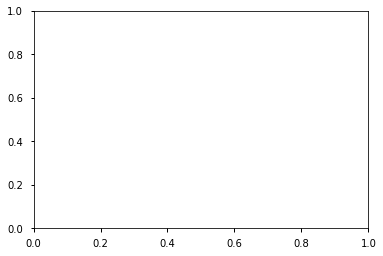

In [65]:
plt.contourf(x,y,prediction)

In [6]:
test_tensor = torch.rand((10, 5))

In [7]:
test_tensor.shape

torch.Size([10, 5])

In [11]:
test_tensor = torch.rand((10,1))
test_tensor_2 = torch.rand((1,10))

In [12]:
test_tensor @ test_tensor_2

tensor([[0.1171, 0.2456, 0.5149, 0.6258, 0.2198, 0.7128, 0.5038, 0.2305, 0.3162,
         0.9743],
        [0.1198, 0.2511, 0.5266, 0.6399, 0.2248, 0.7290, 0.5153, 0.2357, 0.3234,
         0.9964],
        [0.0810, 0.1698, 0.3560, 0.4326, 0.1519, 0.4927, 0.3483, 0.1593, 0.2186,
         0.6735],
        [0.0911, 0.1911, 0.4007, 0.4870, 0.1710, 0.5547, 0.3921, 0.1794, 0.2461,
         0.7582],
        [0.0239, 0.0501, 0.1050, 0.1276, 0.0448, 0.1454, 0.1027, 0.0470, 0.0645,
         0.1987],
        [0.0109, 0.0228, 0.0477, 0.0580, 0.0204, 0.0661, 0.0467, 0.0214, 0.0293,
         0.0903],
        [0.0115, 0.0240, 0.0504, 0.0613, 0.0215, 0.0698, 0.0493, 0.0226, 0.0310,
         0.0954],
        [0.0085, 0.0178, 0.0373, 0.0453, 0.0159, 0.0517, 0.0365, 0.0167, 0.0229,
         0.0706],
        [0.0602, 0.1262, 0.2647, 0.3216, 0.1130, 0.3664, 0.2590, 0.1185, 0.1625,
         0.5008],
        [0.0898, 0.1882, 0.3947, 0.4796, 0.1685, 0.5463, 0.3862, 0.1766, 0.2424,
         0.7468]])

In [17]:
test_tensor.to(dtype=torch.float32, requires_grad=True)

TypeError: to() received an invalid combination of arguments - got (requires_grad=bool, dtype=torch.dtype, ), but expected one of:
 * (torch.device device, torch.dtype dtype, bool non_blocking, bool copy)
 * (torch.dtype dtype, bool non_blocking, bool copy)
 * (Tensor tensor, bool non_blocking, bool copy)


In [9]:
np.squeeze(torch.rand((10, 1)).detach())

tensor([0.6499, 0.5928, 0.2442, 0.3834, 0.7453, 0.9785, 0.6684, 0.5740, 0.6104,
        0.9307])

In [21]:
torch.tensor(torch.rand((10, 5)).numpy(), requires_grad=True)

tensor([[0.3600, 0.6430, 0.9685, 0.4562, 0.5089],
        [0.8153, 0.4840, 0.3934, 0.6650, 0.7970],
        [0.7338, 0.5660, 0.4046, 0.8905, 0.0250],
        [0.7464, 0.3303, 0.8371, 0.6098, 0.0227],
        [0.4997, 0.6406, 0.3026, 0.7290, 0.3725],
        [0.5349, 0.9146, 0.1108, 0.4827, 0.9528],
        [0.0816, 0.8703, 0.3789, 0.6827, 0.8305],
        [0.4820, 0.6484, 0.8214, 0.2271, 0.6757],
        [0.2052, 0.4192, 0.0632, 0.6259, 0.9335],
        [0.0515, 0.8854, 0.7249, 0.0454, 0.2680]], requires_grad=True)